<a href="https://colab.research.google.com/github/Cristian-Rojas2/TalentoTech/blob/main/Analisis_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Taller Práctico: Automatización de Análisis de Datos Textuales**

#**Objetivo:**
Aprender a automatizar el análisis de datos textuales utilizando Python, específicamente para el análisis de reseñas de clientes de una tienda online. Se cubrirá la limpieza de texto, análisis de sentimiento y visualización de los resultados.

#**Caso de Estudio: Análisis de Sentimientos en Reseñas de Clientes**
**Descripción:**
Se tiene un archivo con reseñas textuales de los clientes sobre diferentes productos. El objetivo es automatizar el pipeline de análisis de las reseñas para identificar el sentimiento general (positivo, negativo o neutro) y visualizar los resultados.

#**Parte 1: Configuración del Entorno**

#1. Instalar las librerías necesarias.


In [1]:
!pip install pandas nltk matplotlib wordcloud seaborn
#https://www.datacamp.com/es/tutorial/text-analytics-beginners-nltk



#2. Importar las librerías en Python.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer


#**Parte 2: Cargar y Limpiar los Datos**

In [3]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.8 MB/s eta 0:00:00


In [5]:
import pandas as pd
from faker import Faker
import random

# Initialize Faker to generate fake data
fake = Faker()
# Create a significant number of records (1000 reviews)
n_reseñas = 1000

 # Generate fake data for the review dataset
data_reseñas = {
     "id_reseña": [fake.uuid4() for _ in range(n_reseñas)],
     "producto": [fake.random_element(elements=('Smartphone', 'Laptop', 'Audífonos', 'Reloj Inteligente', 'Tablet')) for _ in range(n_reseñas)],
     "reseña": [fake.text(max_nb_chars=200) for _ in range(n_reseñas)],
     "calificación": [random.randint(1, 5) for _ in range(n_reseñas)],  # Ratings between 1 and 5
     "fecha": [fake.date_time_this_year().strftime('%Y-%m-%d') for _ in range(n_reseñas)],
 }

 # Create DataFrame with generated data
df_reseñas = pd.DataFrame(data_reseñas)

 # Introduce null values randomly in some reviews
nulos_indices = random.sample(range(n_reseñas), 50)  # Choose 50 random reviews to be null
df_reseñas.loc[nulos_indices, 'reseña'] = None

 # Display the first few rows to verify
print(df_reseñas.head())

 # Optionally save the dataset to a CSV file
df_reseñas.to_csv('reseñas.csv', index=False)

                              id_reseña           producto  \
0  f9b68b6f-096a-438b-8a9d-758e016fc413             Tablet   
1  2b5e39dd-b82c-4830-80e1-1f776e071486  Reloj Inteligente   
2  a338d772-4f63-4c84-b571-7a475185fb38             Tablet   
3  f40a782d-dfe6-4acd-a3fc-b98e3b0c1cf8         Smartphone   
4  508d79b5-1319-4476-8fac-af83a0203c40             Tablet   

                                              reseña  calificación       fecha  
0  Student life institution nature whom page true...             5  2024-08-07  
1  Pretty hand down action. Yet view free fish. O...             4  2024-08-28  
2  Same discover also many expert inside vote. Ne...             3  2024-01-05  
3  Force by goal tree set yeah peace. To sea its ...             4  2024-06-04  
4  Threat fast year owner window call best.\nMemo...             4  2024-07-15  


#3. Cargar los datos de reseñas.

In [6]:
# Ruta del archivo CSV
ruta_archivo = '/content/reseñas.csv'  # Cambiar a la ruta local si es necesario
df = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del DataFrame
df.head()

,id_reseña,producto,reseña,calificación,fecha
0,f9b68b6f-096a-438b-8a9d-758e016fc413,Tablet,Student life institution nature whom page true...,5,2024-08-07
1,2b5e39dd-b82c-4830-80e1-1f776e071486,Reloj Inteligente,Pretty hand down action. Yet view free fish. O...,4,2024-08-28
2,a338d772-4f63-4c84-b571-7a475185fb38,Tablet,Same discover also many expert inside vote. Ne...,3,2024-01-05
3,f40a782d-dfe6-4acd-a3fc-b98e3b0c1cf8,Smartphone,Force by goal tree set yeah peace. To sea its ...,4,2024-06-04
4,508d79b5-1319-4476-8fac-af83a0203c40,Tablet,Threat fast year owner window call best.\nMemo...,4,2024-07-15


##4. Limpiar el texto de las reseñas.


In [7]:
# Importar stopwords y herramientas de procesamiento de texto
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

# Limpiar el texto: eliminar símbolos y convertir a minúsculas
def limpiar_texto(texto):
    # Handle None values by returning an empty string or a placeholder
    if texto is None:
        return ''  # Or any other suitable placeholder
    texto = re.sub(r'[^A-Za-z\s]', '', texto.lower())
    texto = ' '.join([palabra for palabra in texto.split() if palabra not in stopwords.words('english')])
    return texto

df_reseñas['reseña_limpia'] = df_reseñas['reseña'].apply(limpiar_texto)

# Ver los resultados de la limpieza
df_reseñas[['reseña', 'reseña_limpia']].head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,reseña,reseña_limpia
0,Student life institution nature whom page true...,student life institution nature page true fina...
1,Pretty hand down action. Yet view free fish. O...,pretty hand action yet view free fish open acr...
2,Same discover also many expert inside vote. Ne...,discover also many expert inside vote need cha...
3,Force by goal tree set yeah peace. To sea its ...,force goal tree set yeah peace sea take bank a...
4,Threat fast year owner window call best.\nMemo...,threat fast year owner window call best memory...


#**Parte 3: Análisis de Sentimiento**

##5. Realizar análisis de sentimiento utilizando VADER.

In [8]:
sia = SentimentIntensityAnalyzer()

# Función para analizar el sentimiento
def obtener_sentimiento(texto):
    return sia.polarity_scores(texto)

# Aplicar la función a las reseñas limpias
df_reseñas['sentimiento'] = df_reseñas['reseña_limpia'].apply(obtener_sentimiento)

# Extraer la clasificación de sentimiento (positivo, negativo, neutro)
df_reseñas['clasificación'] = df_reseñas['sentimiento'].apply(lambda x: 'positivo' if x['compound'] > 0 else 'negativo' if x['compound'] < 0 else 'neutro')

# Mostrar la clasificación
df_reseñas[['reseña_limpia', 'clasificación']].head()


,reseña_limpia,clasificación
0,student life institution nature page true fina...,positivo
1,pretty hand action yet view free fish open acr...,positivo
2,discover also many expert inside vote need cha...,negativo
3,force goal tree set yeah peace sea take bank a...,positivo
4,threat fast year owner window call best memory...,positivo


#**Parte 4: Visualización del Análisis**

##Generar un WordCloud de las palabras más comunes.

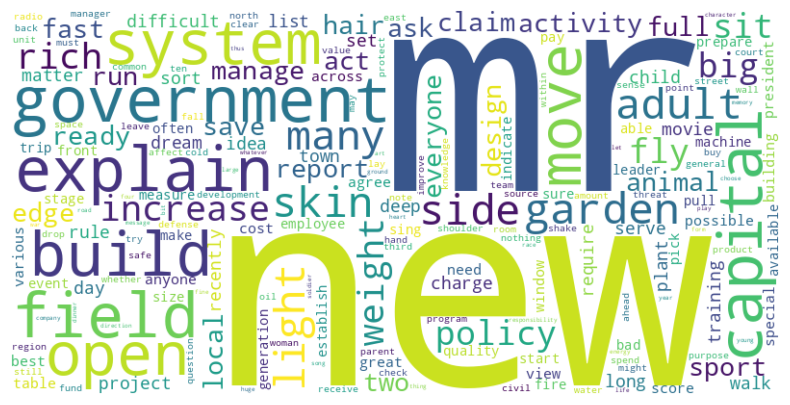

In [9]:
# Generar WordCloud
texto_completo = ' '.join(df_reseñas['reseña_limpia'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_completo)

# Mostrar el WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## 7. Visualizar la distribución del sentimiento.

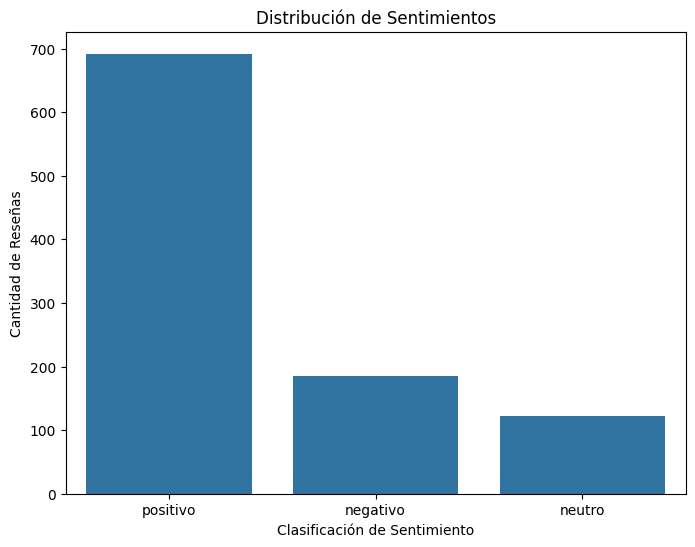

In [10]:
# Gráfico de barras del sentimiento
plt.figure(figsize=(8, 6))
sns.countplot(data=df_reseñas, x='clasificación')
plt.title('Distribución de Sentimientos')
plt.xlabel('Clasificación de Sentimiento')
plt.ylabel('Cantidad de Reseñas')
plt.show()


#**Parte 5: Automatización del Flujo de Trabajo**

##8. Programar la ejecución automática diaria del análisis de sentimiento.

In [11]:
!pip install pandas schedule requests matplotlib seaborn

In [12]:
# hora actual de bogota

from datetime import datetime
import pytz

def get_bogota_time():
  """Returns the current time in Bogota."""
  bogota_tz = pytz.timezone('America/Bogota')
  bogota_now = datetime.now(bogota_tz)
  return bogota_now

current_time_bogota = get_bogota_time()
print(f"La hora actual en Bogotá es: {current_time_bogota}")

La hora actual en Bogotá es: 2024-11-25 16:36:40.642603-05:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Ejecutando análisis de texto en: 2024-11-25 17:01:49
Datos cargados.
Datos limpiados.
Análisis de texto completado. Palabras más comunes: [('sirve', 24), ('malo', 20), ('excelente', 19), ('buen', 19), ('producto', 19), ('falla', 18)]


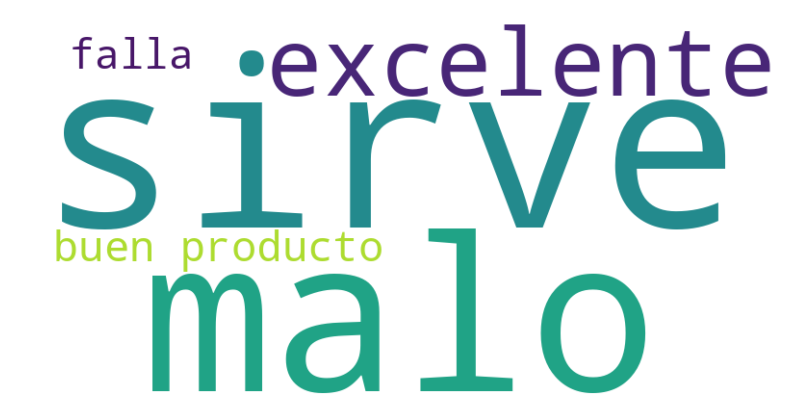

Visualización completada.


KeyboardInterrupt: 

In [18]:
import schedule
import time
from datetime import datetime
import pytz
import pandas as pd
import random
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
import nltk

# Descargar los stopwords si no están ya descargados
nltk.download('stopwords')

# Configurar zona horaria Bogotá
bogota_tz = pytz.timezone("America/Bogota")

# Fase 1: Cargar datos (simulación de dataset de reseñas)
def cargar_datos():
    # Simulación de un dataset pequeño
    data_reseñas = {
        "id_reseña": [f"rev_{i}" for i in range(1, 101)],
        "producto": [random.choice(['Smartphone', 'Laptop', 'Tablet']) for _ in range(100)],
        "reseña": [random.choice(['Buen producto', 'Muy malo', 'Excelente', 'No sirve', 'Falla mucho']) for _ in range(100)],
        "calificación": [random.randint(1, 5) for _ in range(100)],  # Calificaciones entre 1 y 5
        "fecha": pd.date_range(end=pd.Timestamp.now(), periods=100).strftime('%Y-%m-%d')
    }
    df_reseñas = pd.DataFrame(data_reseñas)
    print("Datos cargados.")
    return df_reseñas

# Fase 2: Limpiar datos
def limpiar_datos(df):
    # Eliminamos valores nulos
    df = df.dropna(subset=['reseña'])

    # Convertimos a minúsculas y eliminamos stopwords
    stop_words = set(stopwords.words('spanish'))
    df['reseña_limpia'] = df['reseña'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in stop_words]))

    print("Datos limpiados.")
    return df

# Fase 3: Análisis de texto (conteo de palabras)
def analisis_texto(df):
    # Contar palabras más comunes
    palabras = ' '.join(df['reseña_limpia']).split()
    contador = Counter(palabras)
    palabras_comunes = contador.most_common(10)

    print("Análisis de texto completado. Palabras más comunes:", palabras_comunes)
    return palabras_comunes

# Fase 4: Visualización (Wordcloud)
def visualizar_datos(df):
    texto = ' '.join(df['reseña_limpia'])

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

    print("Visualización completada.")

# Función principal para ejecutar todo el análisis
def ejecutar_analisis_texto():
    current_time = datetime.now(bogota_tz).strftime("%Y-%m-%d %H:%M:%S")
    print(f"Ejecutando análisis de texto en: {current_time}")

    # Llamar a las fases del análisis
    df_reseñas = cargar_datos()     # Cargar datos
    df_limpio = limpiar_datos(df_reseñas)  # Limpiar datos
    analisis_texto(df_limpio)  # Realizar análisis de texto
    visualizar_datos(df_limpio)  # Visualización de resultados

# Programar la ejecución diaria a las 8:00 AM en horario Bogotá
def check_bogota_time():
    current_time = datetime.now(bogota_tz).strftime("%H:%M")
    if current_time == "17:01":
        ejecutar_analisis_texto()

# Ejecutar la función cada minuto para verificar si son las 8:00 AM en Bogotá
while True:
    check_bogota_time()
    time.sleep(60)  # Esperar un minuto antes de volver a verificar

